In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
from pandas_profiling import ProfileReport

#### Reading train data from data source(csv) into a dataframe:

In [2]:
df_train=pd.read_csv('train.csv')
df_train.head()

customer_id      destination  passanger weather  temperature  time  \
0       258868  No Urgent Place  Friend(s)   Sunny           80   6PM   
1       318369             Work      Alone   Sunny           80   7AM   
2       320906  No Urgent Place      Alone   Sunny           80  10AM   
3       412393             Work      Alone   Rainy           55   7AM   
4       290854             Home      Alone   Snowy           30   6PM   

            coupon expiration  gender age  ... CoffeeHouse  CarryAway  \
0  Restaurant(<20)         1d    Male  21  ...         1~3        4~8   
1  Restaurant(<20)         2h    Male  21  ...         1~3        4~8   
2     Coffee House         2h  Female  21  ...         gt8        4~8   
3  Restaurant(<20)         2h  Female  26  ...       less1        4~8   
4     Coffee House         1d    Male  31  ...       less1        4~8   

  RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
0                  4~8            never                1                 1   
1                  1~3            less1                1                 0   
2                  1~3              1~3                1                 1   
3                  1~3            never                1                 1   
4                less1            never                1                 1   

  toCoupon_GEQ25min direction_same direction_opp  Y  
0                 0              0             1  1  
1                 0              1             0  0  
2                 0              0             1  0  
3                 1              0             1  0  
4                 0              0             1  0  

[5 rows x 27 columns]

#### Getting info on the data:

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  object
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  object
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  car                   84 non-null   

In [4]:
df_train.shape[0]

10147

# Pre-Profiling:

In [5]:
profile=ProfileReport(df_train,minimal=True)
profile.to_notebook_iframe()
print('Pre-Profiling accomplished.')

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-Profiling accomplished.


#### Handling the null values & distinct cols:

In [6]:
# Finding the percentage of the data missing in each feature column:

(df_train.isna().sum()/df_train.shape[0])*100

customer_id              0.000000
destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.172169
Bar                      0.867251
CoffeeHouse              1.695082
CarryAway                1.202326
RestaurantLessThan20     0.955948
Restaurant20To50         1.458559
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

- **Drop customer_id**
- **Drop car**

In [7]:
# Creating a copy of the initial train dataframe:

df_train_copy=df_train.copy()

In [8]:
# Dropping customer_id col since it contains distinct value:

df_train_copy.drop('customer_id',axis=1,inplace=True)

In [9]:
# Dropping car col since it contains 99% null values:

df_train_copy.drop('car',axis=1,inplace=True)

In [10]:
# Dropping toCoupon_GEQ5min col since it contains distinct value:

df_train_copy.drop('toCoupon_GEQ5min',axis=1,inplace=True)

- The reocrds containing the null values can be dropped. (But this will not be suitable for this data considering the importance of it.)
- The null values could be filled with 0. But that would be inappropriate for this data.
- The null values could be filled using the mean/mode value. 
- The null values could be filled using forward/backward fill.
- The null values could be filled using interpolation method. 

In [11]:
# filling the null values in Bar col:

df_train_copy.Bar.fillna(method='ffill',inplace=True)

In [12]:
df_train_copy.Bar.isna().sum()

0

In [13]:
df_train_copy.Bar.value_counts()

never    4187
less1    2803
1~3      1996
4~8       868
gt8       293
Name: Bar, dtype: int64

In [14]:
# filling the null values in CoffeeHouse col:

df_train_copy.CoffeeHouse.fillna(method='ffill',inplace=True)

In [15]:
df_train_copy.CoffeeHouse.isna().sum()

0

In [16]:
# filling the null values in CarryAway col:

df_train_copy.CarryAway.fillna(method='ffill',inplace=True)

In [17]:
df_train_copy.CarryAway.isna().sum()

0

In [18]:
# filling the null values in RestaurantLessThan20 col:

df_train_copy.RestaurantLessThan20.fillna(method='ffill',inplace=True)

In [19]:
df_train_copy.RestaurantLessThan20.isna().sum()

0

In [20]:
# filling the null values in Restaurant20To50 col:

df_train_copy.Restaurant20To50.fillna(method='ffill',inplace=True)

In [21]:
df_train_copy.Restaurant20To50.isna().sum()

0

In [22]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           10147 non-null  object
 1   passanger             10147 non-null  object
 2   weather               10147 non-null  object
 3   temperature           10147 non-null  int64 
 4   time                  10147 non-null  object
 5   coupon                10147 non-null  object
 6   expiration            10147 non-null  object
 7   gender                10147 non-null  object
 8   age                   10147 non-null  object
 9   maritalStatus         10147 non-null  object
 10  has_children          10147 non-null  int64 
 11  education             10147 non-null  object
 12  occupation            10147 non-null  object
 13  income                10147 non-null  object
 14  Bar                   10147 non-null  object
 15  CoffeeHouse           10147 non-null

- **Here all the null values are dealt with.**

# Post-profiling:

In [23]:
profile=ProfileReport(df_train_copy,minimal=True)
profile.to_notebook_iframe()
print('Post-Profiling accomplished.')

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Post-Profiling accomplished.


### Inferences on the filtered data:

In [24]:
df_train_copy.head()

destination  passanger weather  temperature  time           coupon  \
0  No Urgent Place  Friend(s)   Sunny           80   6PM  Restaurant(<20)   
1             Work      Alone   Sunny           80   7AM  Restaurant(<20)   
2  No Urgent Place      Alone   Sunny           80  10AM     Coffee House   
3             Work      Alone   Rainy           55   7AM  Restaurant(<20)   
4             Home      Alone   Snowy           30   6PM     Coffee House   

  expiration  gender age      maritalStatus  ...    Bar CoffeeHouse CarryAway  \
0         1d    Male  21  Unmarried partner  ...  less1         1~3       4~8   
1         2h    Male  21             Single  ...  less1         1~3       4~8   
2         2h  Female  21    Married partner  ...  less1         gt8       4~8   
3         2h  Female  26             Single  ...  less1       less1       4~8   
4         1d    Male  31             Single  ...    1~3       less1       4~8   

  RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ15min toCoupon_GEQ25min  \
0                  4~8            never                 1                 0   
1                  1~3            less1                 0                 0   
2                  1~3              1~3                 1                 0   
3                  1~3            never                 1                 1   
4                less1            never                 1                 0   

  direction_same direction_opp  Y  
0              0             1  1  
1              1             0  0  
2              0             1  0  
3              0             1  0  
4              0             1  0  

[5 rows x 24 columns]

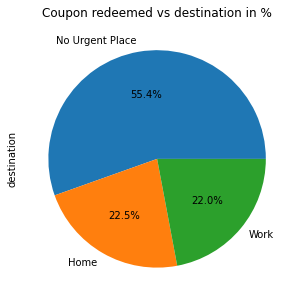

In [25]:
plt.figure(figsize=(10,5))
df_train_copy[df_train_copy.Y==1]['destination'].value_counts(normalize=True).plot.pie(autopct='%3.1f%%')
plt.title('Coupon redeemed vs destination in %')
plt.show()

- **Most of the coupon is redeemed by people who have no urgent work.**

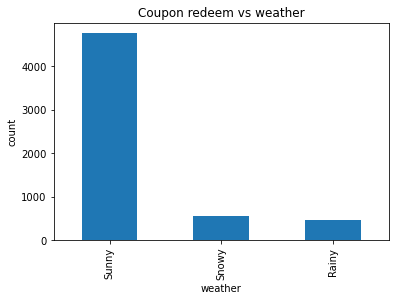

In [26]:
df_train_copy[df_train_copy.Y==1]['weather'].value_counts().plot.bar()
plt.title('Coupon redeem vs weather')
plt.ylabel('count')
plt.xlabel('weather')
plt.show()

- **Coupons are redeemed mostly when the weather is sunny.**

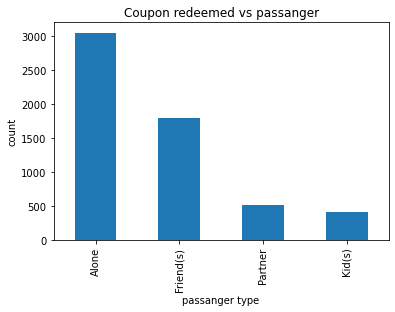

In [27]:
df_train_copy[df_train_copy.Y==1]['passanger'].value_counts().plot.bar()
plt.title('Coupon redeemed vs passanger')
plt.ylabel('count')
plt.xlabel('passanger type')
plt.show()

- **Visitors travelling Alone, have redeemed more coupons.**

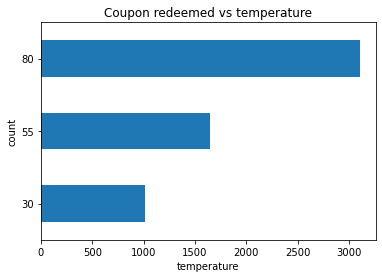

In [28]:
df_train_copy[df_train_copy.Y==1]['temperature'].value_counts().sort_values().plot.barh()
plt.title('Coupon redeemed vs temperature')
plt.ylabel('count')
plt.xlabel('temperature')
plt.show()

- **When the temperature 80, most of the coupons are redeemed.**

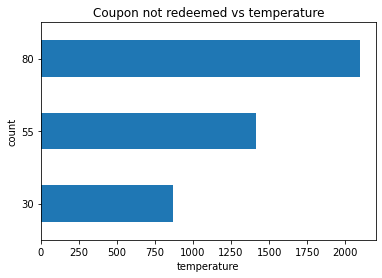

In [29]:
df_train_copy[df_train_copy.Y==0]['temperature'].value_counts().sort_values().plot.barh()
plt.title('Coupon not redeemed vs temperature')
plt.ylabel('count')
plt.xlabel('temperature')
plt.show()

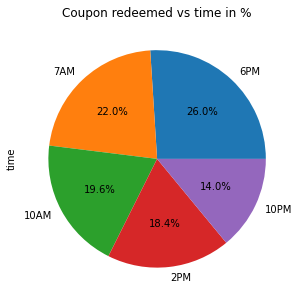

In [30]:
plt.figure(figsize=(10,5))
df_train_copy[df_train_copy.Y==1]['time'].value_counts(normalize=True).plot.pie(autopct='%3.1f%%')
plt.title('Coupon redeemed vs time in %')
plt.show()

- **About 50% of the coupons are redeemed at 7AM & 6AM.**
- **Also. about 68% of the coupons are redeemed at 7AM / 10AM & 6PM.**

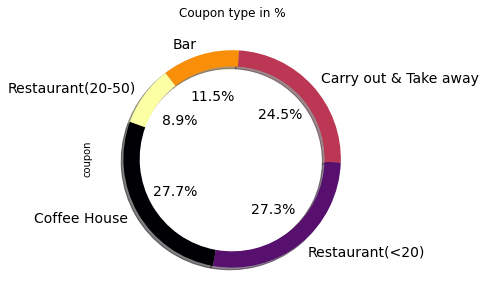

In [31]:
plt.figure(figsize=(10,5))
df_train_copy[df_train_copy.Y==1]['coupon'].value_counts(normalize=True).plot(kind='pie',fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), shadow=True, startangle=160, cmap='inferno')
plt.title('Coupon type in %')
plt.show()

- **More than 50% of the coupons accepted are used in Coffee House, Resturant(<$20) & Carry out_take away**

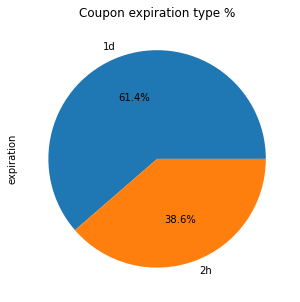

In [32]:
plt.figure(figsize=(10,5))
df_train_copy[df_train_copy.Y==1]['expiration'].value_counts(normalize=True).plot.pie(autopct='%3.1f%%')
plt.title('Coupon expiration type %')
plt.show()

- **Most of the coupons accepted has expiry of 1day**

In [33]:
df_train_copy[df_train_copy.Y==1]['gender'].value_counts(normalize=True)*100

Male      50.537448
Female    49.462552
Name: gender, dtype: float64

- **Both genders equally redeem coupons.**

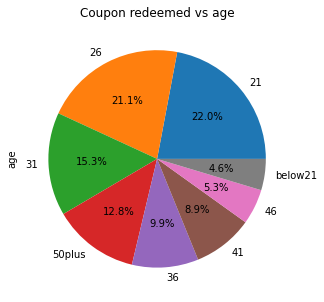

In [34]:
plt.figure(figsize=(10,5))
df_train_copy[df_train_copy.Y==1]['age'].value_counts(normalize=True).plot.pie(autopct='%3.1f%%')
plt.title('Coupon redeemed vs age')
plt.show()

- **Most of the coupons redeemed are by age above 21**
- **More than 50% of the coupons are redeemed between the age range of 21-31.**

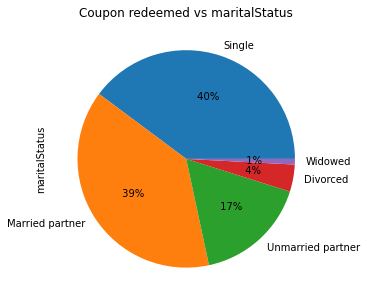

In [35]:
plt.figure(figsize=(14,5))
df_train_copy[df_train_copy.Y==1]['maritalStatus'].value_counts(normalize=True).plot.pie(autopct='%3.0f%%')
plt.title('Coupon redeemed vs maritalStatus')
plt.show()

- **79% of the coupons are redeemed by Single & Married Partner.**

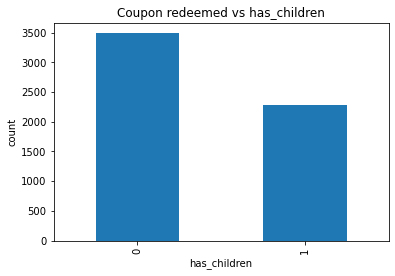

In [36]:
df_train_copy[df_train_copy.Y==1]['has_children'].value_counts().plot.bar()
plt.title('Coupon redeemed vs has_children')
plt.xlabel('has_children')
plt.ylabel('count')
plt.show()

- **Its most likely a coupon to be redeemed if the person has children.**

In [37]:
df_train_copy[df_train_copy.Y==1]['education'].value_counts(normalize=True)*100

Some college - no degree                  35.870319
Bachelors degree                          33.772538
Graduate degree (Masters or Doctorate)    13.540222
Associates degree                          8.755201
High School Graduate                       7.142857
Some High School                           0.918863
Name: education, dtype: float64

- **Not an imp feature**

In [38]:
df_train_copy[df_train_copy.Y==1]['occupation'].value_counts(normalize=True)*100

Unemployed                                   13.973648
Student                                      13.262829
Computer & Mathematical                      11.061026
Sales & Related                               8.633842
Education&Training&Library                    6.778779
Management                                    6.726768
Office & Administrative Support               5.322469
Arts Design Entertainment Sports & Media      4.854369
Business & Financial                          4.316921
Retired                                       3.190014
Food Preparation & Serving Related            2.496533
Healthcare Practitioners & Technical          2.409847
Healthcare Support                            2.253814
Transportation & Material Moving              1.872399
Community & Social Services                   1.699029
Architecture & Engineering                    1.542996
Legal                                         1.456311
Protective Service                            1.421637
Constructi

- **Not an imp feature**

In [39]:
df_train_copy[df_train_copy.Y==1]['income'].value_counts(normalize=True)*100

$25000 - $37499     16.747573
$12500 - $24999     14.701803
$100000 or More     14.251040
$37500 - $49999     14.025659
$50000 - $62499     13.644244
Less than $12500     8.321775
$87500 - $99999      6.432039
$62500 - $74999      6.171983
$75000 - $87499      5.703883
Name: income, dtype: float64

- **Not an imp feature**

# Implementing the ML part:

In [583]:
# Seperating the feature & traget:
X=df_train_copy.drop('Y',axis=1).copy()
y=df_train_copy['Y']

In [41]:
X.head()

destination  passanger weather  temperature  time           coupon  \
0  No Urgent Place  Friend(s)   Sunny           80   6PM  Restaurant(<20)   
1             Work      Alone   Sunny           80   7AM  Restaurant(<20)   
2  No Urgent Place      Alone   Sunny           80  10AM     Coffee House   
3             Work      Alone   Rainy           55   7AM  Restaurant(<20)   
4             Home      Alone   Snowy           30   6PM     Coffee House   

  expiration  gender age      maritalStatus  ...            income    Bar  \
0         1d    Male  21  Unmarried partner  ...  Less than $12500  less1   
1         2h    Male  21             Single  ...   $37500 - $49999  less1   
2         2h  Female  21    Married partner  ...  Less than $12500  less1   
3         2h  Female  26             Single  ...   $25000 - $37499  less1   
4         1d    Male  31             Single  ...   $12500 - $24999    1~3   

  CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0         1~3       4~8                  4~8            never   
1         1~3       4~8                  1~3            less1   
2         gt8       4~8                  1~3              1~3   
3       less1       4~8                  1~3            never   
4       less1       4~8                less1            never   

  toCoupon_GEQ15min toCoupon_GEQ25min direction_same  direction_opp  
0                 1                 0              0              1  
1                 0                 0              1              0  
2                 1                 0              0              1  
3                 1                 1              0              1  
4                 1                 0              0              1  

[5 rows x 23 columns]

In [42]:
# Hot encoding the features(X):
X_enc=pd.get_dummies(X)

In [43]:
X_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Columns: 108 entries, temperature to Restaurant20To50_never
dtypes: int64(6), uint8(102)
memory usage: 1.5 MB


In [44]:
y.head()

Y
0  1
1  0
2  0
3  0
4  0

## Decision Tree :

## Try 1:

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=25,stratify=y) # not used stratify

In [47]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8117, 108), (2030, 108), (8117, 1), (2030, 1))

- **Now we will be fitting the Decision Tree model on the training dataset**

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
from sklearn.model_selection import GridSearchCV
dct = DecisionTreeClassifier(random_state=80)
params = {'max_depth':list(range(1,11)), 'criterion':['gini', 'entropy']}   # 'max_depth' it can be taken any range.
cv_model = GridSearchCV(dct, param_grid = params)
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

{'criterion': 'gini', 'max_depth': 6}


In [50]:
dct = DecisionTreeClassifier(max_depth=6)
dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [51]:
y_pred = dct.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix
round(accuracy_score(y_test,y_pred),2)

0.69

In [53]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[498, 378],
       [248, 906]], dtype=int64)

In [54]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7432321575061527

In [55]:
prob = dct.predict_proba(X_test)
prob

array([[0.78717201, 0.21282799],
       [0.29323308, 0.70676692],
       [0.75362319, 0.24637681],
       ...,
       [0.17073171, 0.82926829],
       [0.08571429, 0.91428571],
       [0.17073171, 0.82926829]])

In [56]:
prob_positive = prob[:,1]

In [57]:
from sklearn.metrics import f1_score,roc_curve,auc
fpr, tpr, threshold = roc_curve(y_test,prob_positive)

In [120]:
ftt = pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns = ['threshold','fpr','tpr'])
ftt.head()

threshold       fpr       tpr
0   2.000000  0.000000  0.000000
1   1.000000  0.003425  0.024263
2   0.914286  0.005708  0.028596
3   0.906977  0.009132  0.045061
4   0.862992  0.031963  0.173310

In [59]:
roc_auc = auc(fpr,tpr)
roc_auc

0.7370798809778178

In [60]:
def plot_ROC(roc,fpr,tpr):
    plt.title("receiver Operating Charecteristc")
    plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
    plt.ylabel('True positive Rate')
    plt.xlabel('False positive Rate')
    plt.show()

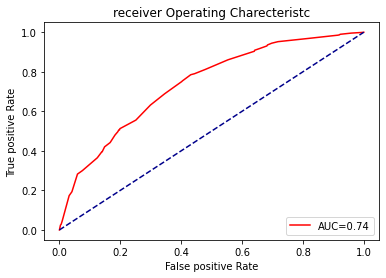

In [61]:
plot_ROC(roc_auc,fpr,tpr)

## Try 2:

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2) # not used stratify & random state

In [122]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8117, 108), (2030, 108), (8117, 1), (2030, 1))

In [123]:
from sklearn.model_selection import GridSearchCV
dct = DecisionTreeClassifier(random_state=80)
params = {'max_depth':list(range(1,11)), 'criterion':['gini', 'entropy']}   # 'max_depth' it can be taken any range.
cv_model = GridSearchCV(dct, param_grid = params)
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

{'criterion': 'entropy', 'max_depth': 7}


In [124]:
dct = DecisionTreeClassifier(criterion='entropy',max_depth=7)
dct.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [125]:
y_pred = dct.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix
round(accuracy_score(y_test,y_pred),2)

0.72

In [127]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[555, 294],
       [276, 905]], dtype=int64)

In [128]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7605042016806722

In [129]:
prob = dct.predict_proba(X_test)
prob

array([[0.85915493, 0.14084507],
       [0.26495726, 0.73504274],
       [0.96969697, 0.03030303],
       ...,
       [0.72289157, 0.27710843],
       [0.23502304, 0.76497696],
       [0.32103321, 0.67896679]])

In [130]:
prob_positive = prob[:,1]

In [131]:
from sklearn.metrics import f1_score,roc_curve,auc
fpr, tpr, threshold = roc_curve(y_test,prob_positive)

In [141]:
ftt = pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns = ['threshold','fpr','tpr'])
ftt

threshold       fpr       tpr
0    2.000000  0.000000  0.000000
1    1.000000  0.007067  0.022015
2    0.987805  0.012956  0.036410
3    0.918919  0.012956  0.040644
4    0.917112  0.025913  0.115157
..        ...       ...       ...
56   0.117647  0.902238  0.986452
57   0.092715  0.944641  0.989839
58   0.035714  0.949352  0.991533
59   0.030303  0.978799  0.994073
60   0.000000  1.000000  1.000000

[61 rows x 3 columns]

In [133]:
roc_auc = auc(fpr,tpr)
roc_auc

0.7609749578375317

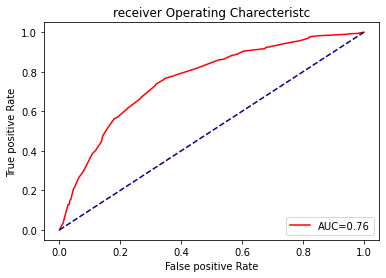

In [134]:
plot_ROC(roc_auc,fpr,tpr)

## Try 3:

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.1) # not used stratify

In [149]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9132, 108), (1015, 108), (9132, 1), (1015, 1))

In [150]:
from sklearn.model_selection import GridSearchCV
dct = DecisionTreeClassifier(random_state=80)
params = {'max_depth':list(range(1,11)), 'criterion':['gini', 'entropy']}   # 'max_depth' it can be taken any range.
cv_model = GridSearchCV(dct, param_grid = params)
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

{'criterion': 'gini', 'max_depth': 9}


In [151]:
dct = DecisionTreeClassifier(max_depth=9)
dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [152]:
y_pred = dct.predict(X_test)

In [153]:
from sklearn.metrics import accuracy_score, confusion_matrix
round(accuracy_score(y_test,y_pred),2)

0.69

# Random Forest :

## Try 1:

In [602]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=25,stratify=y) # not used stratify

In [603]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8117, 108), (2030, 108), (8117,), (2030,))

In [604]:
from sklearn.ensemble import RandomForestClassifier

In [605]:
rfc = RandomForestClassifier()
params = {'n_estimators':list(range(1,20))}   # 'max_depth' it can be taken any range.
cv_model = GridSearchCV(estimator=rfc,cv=5,param_grid = params,return_train_score=True)
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

{'n_estimators': 19}


In [158]:
rfc=RandomForestClassifier(n_estimators=19,max_depth=3,random_state=1)

In [159]:
rfc.fit(X_train,y_train)

<ipython-input-159-0b00acaf8842>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier(max_depth=3, n_estimators=19, random_state=1)

In [160]:
y_pred=rfc.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score, confusion_matrix
round(accuracy_score(y_test,y_pred),2)

0.64

## Try 2:

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.15) # not used stratify

In [163]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8624, 108), (1523, 108), (8624, 1), (1523, 1))

In [585]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8624, 108), (1523, 108), (8624,), (1523,))

In [164]:
rfc = RandomForestClassifier()
params = {'n_estimators':list(range(1,11))}   # 'max_depth' it can be taken any range.
cv_model = GridSearchCV(estimator=rfc,cv=5,param_grid = params,return_train_score=True)
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection

C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection

{'n_estimators': 10}


In [209]:
rfc=RandomForestClassifier(n_estimators=525,max_depth=45,min_samples_split=4)

In [210]:
rfc.fit(X_train,y_train)

<ipython-input-210-0b00acaf8842>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier(max_depth=45, min_samples_split=4, n_estimators=525)

In [588]:
y_pred=rfc.predict(X_test)

In [589]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.7439264609323704

In [220]:
prob = rfc.predict_proba(X_test)
prob

array([[0.7381678 , 0.2618322 ],
       [0.55902797, 0.44097203],
       [0.36139229, 0.63860771],
       ...,
       [0.6034127 , 0.3965873 ],
       [0.42091383, 0.57908617],
       [0.79722449, 0.20277551]])

In [221]:
prob_positive = prob[:,1]

In [222]:
fpr, tpr, threshold = roc_curve(y_test,prob_positive)

In [228]:
ftt = pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns = ['threshold','fpr','tpr'])
ftt[:150]

threshold       fpr       tpr
0     1.972263  0.000000  0.000000
1     0.972263  0.000000  0.001179
2     0.937637  0.000000  0.014151
3     0.936472  0.001481  0.014151
4     0.904254  0.001481  0.047170
..         ...       ...       ...
145   0.682927  0.133333  0.555425
146   0.682605  0.134815  0.555425
147   0.681320  0.134815  0.560142
148   0.681215  0.136296  0.560142
149   0.680834  0.136296  0.561321

[150 rows x 3 columns]

In [224]:
roc_auc = auc(fpr,tpr)
roc_auc

0.8163766596785464

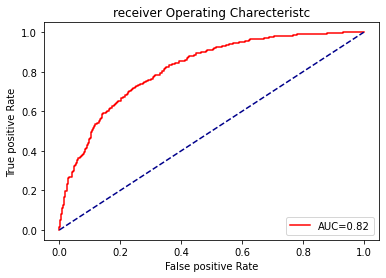

In [225]:
plot_ROC(roc_auc,fpr,tpr)

## Try 3:

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.1) # changed the test size

In [232]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9132, 108), (1015, 108), (9132, 1), (1015, 1))

In [233]:
rfc = RandomForestClassifier()
params = {'n_estimators':list(range(1,11))}   # 'max_depth' it can be taken any range.
cv_model = GridSearchCV(estimator=rfc,cv=5,param_grid = params,return_train_score=True)
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection

C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection

{'n_estimators': 9}


In [324]:
rfc=RandomForestClassifier(n_estimators=550,min_samples_split=3) # not used max_depth=45

In [325]:
rfc.fit(X_train,y_train)

<ipython-input-325-0b00acaf8842>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier(min_samples_split=3, n_estimators=550)

In [326]:
y_pred=rfc.predict(X_test)

In [303]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.7605911330049261

In [334]:
prob = rfc.predict_proba(X_test)
prob

array([[0.36375325, 0.63624675],
       [0.22215152, 0.77784848],
       [0.66778788, 0.33221212],
       ...,
       [0.73727273, 0.26272727],
       [0.28372727, 0.71627273],
       [0.51727273, 0.48272727]])

In [335]:
prob_positive = prob[:,1]

In [336]:
fpr, tpr, threshold = roc_curve(y_test,prob_positive)

In [337]:
ftt = pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns = ['threshold','fpr','tpr'])
ftt

threshold       fpr       tpr
0     1.978333  0.000000  0.000000
1     0.978333  0.000000  0.001808
2     0.911212  0.000000  0.043400
3     0.911091  0.002165  0.043400
4     0.879061  0.002165  0.081374
..         ...       ...       ...
343   0.126727  0.967532  0.996383
344   0.124667  0.967532  0.998192
345   0.119424  0.976190  0.998192
346   0.118727  0.976190  1.000000
347   0.038939  1.000000  1.000000

[348 rows x 3 columns]

In [338]:
roc_auc = auc(fpr,tpr)
roc_auc

0.8253113673547671

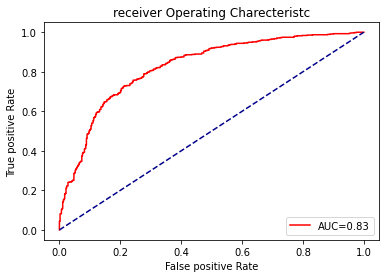

In [339]:
plot_ROC(roc_auc,fpr,tpr)

## Try 4:

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.15) # changed the test size

In [341]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8624, 108), (1523, 108), (8624, 1), (1523, 1))

In [342]:
rfc=RandomForestClassifier(n_estimators=550,min_samples_split=3)

In [343]:
rfc.fit(X_train,y_train)

<ipython-input-343-0b00acaf8842>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier(min_samples_split=3, n_estimators=550)

In [344]:
y_pred=rfc.predict(X_test)

In [345]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.7603414313854235

In [346]:
prob = rfc.predict_proba(X_test)
prob

array([[0.29393939, 0.70606061],
       [0.48359307, 0.51640693],
       [0.33048485, 0.66951515],
       ...,
       [0.2885368 , 0.7114632 ],
       [0.24024675, 0.75975325],
       [0.57072727, 0.42927273]])

In [347]:
prob_positive = prob[:,1]

In [348]:
fpr, tpr, threshold = roc_curve(y_test,prob_positive)

In [349]:
ftt = pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns = ['threshold','fpr','tpr'])
ftt

threshold       fpr       tpr
0     1.978030  0.000000  0.000000
1     0.978030  0.000000  0.001155
2     0.917121  0.000000  0.034642
3     0.915182  0.001522  0.034642
4     0.908697  0.001522  0.035797
..         ...       ...       ...
517   0.107273  0.987823  0.997691
518   0.099364  0.987823  0.998845
519   0.097576  0.992390  0.998845
520   0.096394  0.992390  1.000000
521   0.077364  1.000000  1.000000

[522 rows x 3 columns]

In [350]:
roc_auc = auc(fpr,tpr)
roc_auc

0.827404114861801

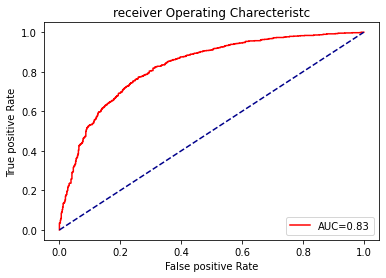

In [351]:
plot_ROC(roc_auc,fpr,tpr)

## Try 5:

In [362]:
X.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp'],
      dtype='object')

In [ ]:
# 'direction_same', 'direction_opp'

In [ ]:
X_copy=X.copy()

In [364]:
X_copy.drop(['direction_same','direction_opp'],axis=1,inplace=True)

In [365]:
X_copy.head()

destination  passanger weather  temperature  time           coupon  \
0  No Urgent Place  Friend(s)   Sunny           80   6PM  Restaurant(<20)   
1             Work      Alone   Sunny           80   7AM  Restaurant(<20)   
2  No Urgent Place      Alone   Sunny           80  10AM     Coffee House   
3             Work      Alone   Rainy           55   7AM  Restaurant(<20)   
4             Home      Alone   Snowy           30   6PM     Coffee House   

  expiration  gender age      maritalStatus  ...                 education  \
0         1d    Male  21  Unmarried partner  ...  Some college - no degree   
1         2h    Male  21             Single  ...          Bachelors degree   
2         2h  Female  21    Married partner  ...  Some college - no degree   
3         2h  Female  26             Single  ...          Bachelors degree   
4         1d    Male  31             Single  ...  Some college - no degree   

                occupation            income    Bar CoffeeHouse CarryAway  \
0                  Student  Less than $12500  less1         1~3       4~8   
1                  Student   $37500 - $49999  less1         1~3       4~8   
2                  Student  Less than $12500  less1         gt8       4~8   
3  Computer & Mathematical   $25000 - $37499  less1       less1       4~8   
4               Unemployed   $12500 - $24999    1~3       less1       4~8   

  RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ15min  toCoupon_GEQ25min  
0                  4~8            never                 1                  0  
1                  1~3            less1                 0                  0  
2                  1~3              1~3                 1                  0  
3                  1~3            never                 1                  1  
4                less1            never                 1                  0  

[5 rows x 21 columns]

In [366]:
X_copy_enc=pd.get_dummies(X_copy)

In [385]:
X_train_cp, X_test_cp, y_train_cp, y_test_cp = train_test_split(X_copy_enc, y, test_size=0.25)

In [386]:
X_train_cp.shape,X_test_cp.shape,y_train_cp.shape,y_test_cp.shape

((7610, 106), (2537, 106), (7610, 1), (2537, 1))

In [400]:
rfc=RandomForestClassifier(n_estimators=340,min_samples_split=4)

In [401]:
rfc.fit(X_train_cp,y_train_cp)

<ipython-input-401-47941edfde59>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_cp,y_train_cp)


RandomForestClassifier(min_samples_split=4, n_estimators=340)

In [402]:
y_pred=rfc.predict(X_test_cp)

In [403]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test_cp,y_pred)

0.7504927079227434

## Using CV :

In [358]:
from sklearn.model_selection import cross_validate,cross_val_score

In [359]:
scores=cross_val_score(estimator=rfc,X=X_train,y=y_train,cv=5)
scores  

C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\model_selection

array([0.76173913, 0.76347826, 0.75188406, 0.76869565, 0.73143852])

In [360]:
round(scores.mean(),2)  

0.76

# Logistic Regression:

## Try 1:

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2) #, random_state=25,stratify=y

In [405]:
from sklearn.linear_model import LogisticRegression

In [406]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [407]:
y_pred = logr.predict(X_test)

In [408]:
accuracy_score(y_test, y_pred)

0.6758620689655173

# KNN Model : 

## Try 1:

In [409]:
X_train, X_test, y_train, y_test = train_test_split(X_enc,y, test_size = 0.25, random_state = 33,stratify=y)

In [410]:
from sklearn.neighbors import KNeighborsClassifier

In [411]:
knn = KNeighborsClassifier(n_neighbors=9) 

In [412]:
knn.fit(X_train, y_train)

C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [413]:
y_pred = knn.predict(X_test)

In [414]:
accuracy_score(y_test, y_pred)

0.6681119432400473

In [415]:
scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=5)
scores  

C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

array([0.65834428, 0.65308804, 0.6544021 , 0.63140604, 0.6629435 ])

In [416]:
knn = KNeighborsClassifier()
params = {'n_neighbors':list(range(1,11))}   # 'max_depth' it can be taken any range.
cv_model = GridSearchCV(estimator=knn,cv=5,param_grid = params,return_train_score=True)
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

{'n_neighbors': 9}


C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Try 2:

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X_enc,y, test_size = 0.15) #, random_state = 33,stratify=y

In [458]:
knn = KNeighborsClassifier(n_neighbors=9) 

In [459]:
knn.fit(X_train, y_train)

C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [460]:
y_pred = knn.predict(X_test)

In [461]:
accuracy_score(y_test, y_pred)

0.6868023637557452

# SVM model :

## Try 1:

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X_enc,y, test_size = 0.15) 

In [470]:
from sklearn.svm import SVC

In [471]:
clf = SVC()

In [472]:
clf.fit(X_train, y_train) 

C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [473]:
y_pred = clf.predict(X_test)

In [474]:
accuracy_score(y_test, y_pred)

0.5646749835850295

In [475]:
scores=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=5)
scores  

C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\AnacondaJupyter\Anaconda_New\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

array([0.56927536, 0.56927536, 0.56927536, 0.56869565, 0.56902552])

# Tuning the model:

In [117]:
new_pred = (prob_positive>0.212828).astype("int")  #0.105995
new_pred

array([0, 1, 1, ..., 1, 1, 1])

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix
round(accuracy_score(y_test,new_pred),2)

0.63

# Test Data :

In [62]:
df_test=pd.read_csv('test.csv')
df_test.head()

customer_id      destination  passanger weather  temperature  time  \
0       374679  No Urgent Place  Friend(s)   Sunny           80   6PM   
1       469678             Home      Alone   Sunny           80   6PM   
2       216140  No Urgent Place      Alone   Rainy           55  10AM   
3       184301  No Urgent Place    Partner   Sunny           80   6PM   
4       148720             Work      Alone   Sunny           30   7AM   

                  coupon expiration  gender      age  ...    Bar  CoffeeHouse  \
0           Coffee House         1d  Female  below21  ...  never          1~3   
1  Carry out & Take away         2h    Male       21  ...    1~3        never   
2           Coffee House         1d  Female       26  ...  never        never   
3                    Bar         1d    Male   50plus  ...  never          4~8   
4  Carry out & Take away         1d  Female       26  ...  never        never   

  CarryAway RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min  \
0     less1                  4~8            less1                1   
1       gt8                  4~8              1~3                1   
2       1~3                less1            never                1   
3       4~8                  1~3            less1                1   
4       1~3                  4~8            less1                1   

  toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp  
0                 0                 0              0             1  
1                 1                 0              1             0  
2                 1                 0              0             1  
3                 1                 0              0             1  
4                 1                 0              0             1  

[5 rows x 26 columns]

In [63]:
(df_test.isna().sum()/df_test.shape[0])*100

customer_id              0.000000
destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.054001
Bar                      0.748916
CoffeeHouse              1.773749
CarryAway                1.143082
RestaurantLessThan20     1.300749
Restaurant20To50         1.616082
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
dtype: float64

In [64]:
df_test_copy=df_test.copy()

In [65]:
df_test_copy.drop('customer_id',axis=1,inplace=True)

In [66]:
df_test_copy.drop('car',axis=1,inplace=True)

In [67]:
df_test_copy.drop('toCoupon_GEQ5min',axis=1,inplace=True)

In [68]:
df_test_copy.Bar.fillna(method='ffill',inplace=True)

In [69]:
df_test_copy.CoffeeHouse.fillna(method='ffill',inplace=True)

In [70]:
df_test_copy.CarryAway.fillna(method='ffill',inplace=True)

In [71]:
df_test_copy.RestaurantLessThan20.fillna(method='ffill',inplace=True)

In [72]:
df_test_copy.Restaurant20To50.fillna(method='ffill',inplace=True)

In [73]:
df_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2537 non-null   object
 1   passanger             2537 non-null   object
 2   weather               2537 non-null   object
 3   temperature           2537 non-null   int64 
 4   time                  2537 non-null   object
 5   coupon                2537 non-null   object
 6   expiration            2537 non-null   object
 7   gender                2537 non-null   object
 8   age                   2537 non-null   object
 9   maritalStatus         2537 non-null   object
 10  has_children          2537 non-null   int64 
 11  education             2537 non-null   object
 12  occupation            2537 non-null   object
 13  income                2537 non-null   object
 14  Bar                   2537 non-null   object
 15  CoffeeHouse           2537 non-null   

In [74]:
df_test_copy_enc=pd.get_dummies(df_test_copy)

In [75]:
df_test_copy_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Columns: 108 entries, temperature to Restaurant20To50_never
dtypes: int64(6), uint8(102)
memory usage: 371.8 KB


In [76]:
df_test_copy_enc.head()

temperature  has_children  toCoupon_GEQ15min  toCoupon_GEQ25min  \
0           80             0                  0                  0   
1           80             0                  1                  0   
2           55             1                  1                  0   
3           80             1                  1                  0   
4           30             0                  1                  0   

   direction_same  direction_opp  destination_Home  \
0               0              1                 0   
1               1              0                 1   
2               0              1                 0   
3               0              1                 0   
4               0              1                 0   

   destination_No Urgent Place  destination_Work  passanger_Alone  ...  \
0                            1                 0                0  ...   
1                            0                 0                1  ...   
2                            1                 0                1  ...   
3                            1                 0                0  ...   
4                            0                 1                1  ...   

   RestaurantLessThan20_1~3  RestaurantLessThan20_4~8  \
0                         0                         1   
1                         0                         1   
2                         0                         0   
3                         1                         0   
4                         0                         1   

   RestaurantLessThan20_gt8  RestaurantLessThan20_less1  \
0                         0                           0   
1                         0                           0   
2                         0                           1   
3                         0                           0   
4                         0                           0   

   RestaurantLessThan20_never  Restaurant20To50_1~3  Restaurant20To50_4~8  \
0                           0                     0                     0   
1                           0                     1                     0   
2                           0                     0                     0   
3                           0                     0                     0   
4                           0                     0                     0   

   Restaurant20To50_gt8  Restaurant20To50_less1  Restaurant20To50_never  
0                     0                       1                       0  
1                     0                       0                       0  
2                     0                       0                       1  
3                     0                       1                       0  
4                     0                       1                       0  

[5 rows x 108 columns]

In [77]:
X_test_final=df_test_copy_enc.copy()

In [78]:
X_test_final.head()

temperature  has_children  toCoupon_GEQ15min  toCoupon_GEQ25min  \
0           80             0                  0                  0   
1           80             0                  1                  0   
2           55             1                  1                  0   
3           80             1                  1                  0   
4           30             0                  1                  0   

   direction_same  direction_opp  destination_Home  \
0               0              1                 0   
1               1              0                 1   
2               0              1                 0   
3               0              1                 0   
4               0              1                 0   

   destination_No Urgent Place  destination_Work  passanger_Alone  ...  \
0                            1                 0                0  ...   
1                            0                 0                1  ...   
2                            1                 0                1  ...   
3                            1                 0                0  ...   
4                            0                 1                1  ...   

   RestaurantLessThan20_1~3  RestaurantLessThan20_4~8  \
0                         0                         1   
1                         0                         1   
2                         0                         0   
3                         1                         0   
4                         0                         1   

   RestaurantLessThan20_gt8  RestaurantLessThan20_less1  \
0                         0                           0   
1                         0                           0   
2                         0                           1   
3                         0                           0   
4                         0                           0   

   RestaurantLessThan20_never  Restaurant20To50_1~3  Restaurant20To50_4~8  \
0                           0                     0                     0   
1                           0                     1                     0   
2                           0                     0                     0   
3                           0                     0                     0   
4                           0                     0                     0   

   Restaurant20To50_gt8  Restaurant20To50_less1  Restaurant20To50_never  
0                     0                       1                       0  
1                     0                       0                       0  
2                     0                       0                       1  
3                     0                       1                       0  
4                     0                       1                       0  

[5 rows x 108 columns]

In [79]:
X_test_final.shape

(2537, 108)

## Prediction using the test data:

## Decision Trees:

In [135]:
y_pred_test = dct.predict(X_test_final)

## RF :

In [352]:
y_pred_test = rfc.predict(X_test_final)

In [353]:
cust_id=df_test.customer_id
cust_id=pd.DataFrame(cust_id)

In [354]:
cust_id

customer_id
0          374679
1          469678
2          216140
3          184301
4          148720
...           ...
2532       356045
2533       498759
2534       356159
2535       218541
2536       467387

[2537 rows x 1 columns]

In [355]:
y_pred_test_ser=pd.DataFrame(y_pred_test,columns=['Y'])
y_pred_test_ser

Y
0     1
1     1
2     0
3     0
4     1
...  ..
2532  0
2533  1
2534  0
2535  0
2536  1

[2537 rows x 1 columns]

In [356]:
df_final=pd.concat([cust_id,y_pred_test_ser],axis=1)
df_final

customer_id  Y
0          374679  1
1          469678  1
2          216140  0
3          184301  0
4          148720  1
...           ... ..
2532       356045  0
2533       498759  1
2534       356159  0
2535       218541  0
2536       467387  1

[2537 rows x 2 columns]

In [357]:
# df_final.to_csv(path_or_buf='Group8_05.csv',index=False)

# Using Sandeep's Data :

In [476]:
data_sf=pd.read_csv('https://raw.githubusercontent.com/DepinSundaram/AIML/main/Sandeep-Hackathon/season%201/clean_train.csv')
data_sf.head()

Unnamed: 0  temperature  time  expiration  age  has_children  \
0           0           80    18          24   21             0   
1           1           80     7           2   21             0   
2           2           80    10           2   21             0   
3           3           55     7           2   26             0   
4           4           30    18          24   31             0   

   toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  ...  \
0                  1                  0               0              1  ...   
1                  0                  0               1              0  ...   
2                  1                  0               0              1  ...   
3                  1                  1               0              1  ...   
4                  1                  0               0              1  ...   

   RestaurantLessThan20_1_3  RestaurantLessThan20_4_8  \
0                         0                         1   
1                         1                         0   
2                         1                         0   
3                         1                         0   
4                         0                         0   

   RestaurantLessThan20_gt8  RestaurantLessThan20_less1  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           1   

   RestaurantLessThan20_never  Restaurant20To50_1_3  Restaurant20To50_4_8  \
0                           0                     0                     0   
1                           0                     0                     0   
2                           0                     1                     0   
3                           0                     0                     0   
4                           0                     0                     0   

   Restaurant20To50_gt8  Restaurant20To50_less1  Restaurant20To50_never  
0                     0                       0                       1  
1                     0                       1                       0  
2                     0                       0                       0  
3                     0                       0                       1  
4                     0                       0                       1  

[5 rows x 90 columns]

In [477]:
data_sf.drop('Unnamed: 0',axis=1,inplace=True)
data_sf.head()

temperature  time  expiration  age  has_children  toCoupon_GEQ15min  \
0           80    18          24   21             0                  1   
1           80     7           2   21             0                  0   
2           80    10           2   21             0                  1   
3           55     7           2   26             0                  1   
4           30    18          24   31             0                  1   

   toCoupon_GEQ25min  direction_same  direction_opp  Y  ...  \
0                  0               0              1  1  ...   
1                  0               1              0  0  ...   
2                  0               0              1  0  ...   
3                  1               0              1  0  ...   
4                  0               0              1  0  ...   

   RestaurantLessThan20_1_3  RestaurantLessThan20_4_8  \
0                         0                         1   
1                         1                         0   
2                         1                         0   
3                         1                         0   
4                         0                         0   

   RestaurantLessThan20_gt8  RestaurantLessThan20_less1  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           1   

   RestaurantLessThan20_never  Restaurant20To50_1_3  Restaurant20To50_4_8  \
0                           0                     0                     0   
1                           0                     0                     0   
2                           0                     1                     0   
3                           0                     0                     0   
4                           0                     0                     0   

   Restaurant20To50_gt8  Restaurant20To50_less1  Restaurant20To50_never  
0                     0                       0                       1  
1                     0                       1                       0  
2                     0                       0                       0  
3                     0                       0                       1  
4                     0                       0                       1  

[5 rows x 89 columns]

In [478]:
data_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 89 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   temperature                                         10147 non-null  int64
 1   time                                                10147 non-null  int64
 2   expiration                                          10147 non-null  int64
 3   age                                                 10147 non-null  int64
 4   has_children                                        10147 non-null  int64
 5   toCoupon_GEQ15min                                   10147 non-null  int64
 6   toCoupon_GEQ25min                                   10147 non-null  int64
 7   direction_same                                      10147 non-null  int64
 8   direction_opp                                       10147 non-null  int64
 9   Y                

In [479]:
data_sf_copy=data_sf.copy()

In [480]:
data_sf_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 89 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   temperature                                         10147 non-null  int64
 1   time                                                10147 non-null  int64
 2   expiration                                          10147 non-null  int64
 3   age                                                 10147 non-null  int64
 4   has_children                                        10147 non-null  int64
 5   toCoupon_GEQ15min                                   10147 non-null  int64
 6   toCoupon_GEQ25min                                   10147 non-null  int64
 7   direction_same                                      10147 non-null  int64
 8   direction_opp                                       10147 non-null  int64
 9   Y                

In [504]:
# X_sf=data_sf_copy.drop('Y',axis=1).copy()
y_sf=data_sf_copy['Y']

In [486]:
X_sf.head()

temperature  time  expiration  age  has_children  toCoupon_GEQ15min  \
0           80    18          24   21             0                  1   
1           80     7           2   21             0                  0   
2           80    10           2   21             0                  1   
3           55     7           2   26             0                  1   
4           30    18          24   31             0                  1   

   toCoupon_GEQ25min  direction_same  direction_opp  income_min  ...  \
0                  0               0              1           0  ...   
1                  0               1              0       37500  ...   
2                  0               0              1           0  ...   
3                  1               0              1       25000  ...   
4                  0               0              1       12500  ...   

   RestaurantLessThan20_1_3  RestaurantLessThan20_4_8  \
0                         0                         1   
1                         1                         0   
2                         1                         0   
3                         1                         0   
4                         0                         0   

   RestaurantLessThan20_gt8  RestaurantLessThan20_less1  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           1   

   RestaurantLessThan20_never  Restaurant20To50_1_3  Restaurant20To50_4_8  \
0                           0                     0                     0   
1                           0                     0                     0   
2                           0                     1                     0   
3                           0                     0                     0   
4                           0                     0                     0   

   Restaurant20To50_gt8  Restaurant20To50_less1  Restaurant20To50_never  
0                     0                       0                       1  
1                     0                       1                       0  
2                     0                       0                       0  
3                     0                       0                       1  
4                     0                       0                       1  

[5 rows x 88 columns]

# Random Forest on Sandeep Data:

## Try 1:

In [505]:
X_train, X_test, y_train, y_test = train_test_split(X_sf, y_sf, test_size=0.15)

In [506]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8624, 88), (1523, 88), (8624,), (1523,))

In [507]:
rfc_sf=RandomForestClassifier(n_estimators=500,min_samples_split=3)

In [508]:
rfc_sf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=500)

In [509]:
y_pred=rfc_sf.predict(X_test)

In [519]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.7741300065659882

In [511]:
scores=cross_val_score(estimator=rfc_sf,X=X_train,y=y_train,cv=5)
scores  

array([0.74782609, 0.75536232, 0.76057971, 0.74202899, 0.74651972])

In [512]:
prob = rfc_sf.predict_proba(X_test)
prob

array([[0.47246429, 0.52753571],
       [0.59993333, 0.40006667],
       [0.81133333, 0.18866667],
       ...,
       [0.0671    , 0.9329    ],
       [0.44237619, 0.55762381],
       [0.28053333, 0.71946667]])

In [513]:
prob_positive = prob[:,1]

In [514]:
fpr, tpr, threshold = roc_curve(y_test,prob_positive)

In [515]:
ftt = pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns = ['threshold','fpr','tpr'])
ftt

threshold       fpr       tpr
0     1.971833  0.000000  0.000000
1     0.971833  0.000000  0.001182
2     0.949833  0.000000  0.005910
3     0.947000  0.001477  0.005910
4     0.904733  0.001477  0.042553
..         ...       ...       ...
469   0.161333  0.937962  0.997636
470   0.160500  0.937962  0.998818
471   0.139471  0.963072  0.998818
472   0.135133  0.963072  1.000000
473   0.024867  1.000000  1.000000

[474 rows x 3 columns]

In [516]:
roc_auc = auc(fpr,tpr)
roc_auc

0.8407625073767945

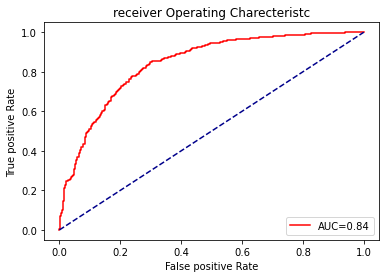

In [517]:
plot_ROC(roc_auc,fpr,tpr)

## Try 2:

In [537]:
rfc_sf=RandomForestClassifier(n_estimators=550,min_samples_split=3)

In [538]:
rfc_sf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=550)

In [539]:
y_pred=rfc_sf.predict(X_test)

In [540]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.7800393959290873

## Try 3:

In [598]:
rfc_sf=RandomForestClassifier(n_estimators=530,min_samples_split=5)

In [599]:
rfc_sf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=530)

In [600]:
y_pred=rfc_sf.predict(X_test)

In [601]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.7498358502954695

In [527]:
X_test_final=pd.read_csv('https://raw.githubusercontent.com/DepinSundaram/AIML/main/Sandeep-Hackathon/season%201/final_clean_test.csv')
X_test_final.head()

Unnamed: 0  temperature  time  expiration  age  has_children  \
0           0           80    18          24   20             0   
1           1           80    18           2   21             0   
2           2           55    10          24   26             1   
3           3           80    18          24   51             1   
4           4           30     7          24   26             0   

   toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  ...  \
0                  0                  0               0              1  ...   
1                  1                  0               1              0  ...   
2                  1                  0               0              1  ...   
3                  1                  0               0              1  ...   
4                  1                  0               0              1  ...   

   RestaurantLessThan20_1_3  RestaurantLessThan20_4_8  \
0                         0                         1   
1                         0                         1   
2                         0                         0   
3                         1                         0   
4                         0                         1   

   RestaurantLessThan20_gt8  RestaurantLessThan20_less1  \
0                         0                           0   
1                         0                           0   
2                         0                           1   
3                         0                           0   
4                         0                           0   

   RestaurantLessThan20_never  Restaurant20To50_1_3  Restaurant20To50_4_8  \
0                           0                     0                     0   
1                           0                     1                     0   
2                           0                     0                     0   
3                           0                     0                     0   
4                           0                     0                     0   

   Restaurant20To50_gt8  Restaurant20To50_less1  Restaurant20To50_never  
0                     0                       1                       0  
1                     0                       0                       0  
2                     0                       0                       1  
3                     0                       1                       0  
4                     0                       1                       0  

[5 rows x 89 columns]

In [528]:
X_test_final.drop('Unnamed: 0',axis=1,inplace=True)

In [529]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   temperature                                         2537 non-null   int64
 1   time                                                2537 non-null   int64
 2   expiration                                          2537 non-null   int64
 3   age                                                 2537 non-null   int64
 4   has_children                                        2537 non-null   int64
 5   toCoupon_GEQ15min                                   2537 non-null   int64
 6   toCoupon_GEQ25min                                   2537 non-null   int64
 7   direction_same                                      2537 non-null   int64
 8   direction_opp                                       2537 non-null   int64
 9   income_min         

In [541]:
y_pred_test = rfc_sf.predict(X_test_final)

In [542]:
cust_id=df_test.customer_id
cust_id=pd.DataFrame(cust_id)

In [543]:
y_pred_test_ser=pd.DataFrame(y_pred_test,columns=['Y'])
y_pred_test_ser

Y
0     1
1     1
2     0
3     0
4     1
...  ..
2532  0
2533  1
2534  0
2535  0
2536  1

[2537 rows x 1 columns]

In [544]:
df_final=pd.concat([cust_id,y_pred_test_ser],axis=1)
df_final

customer_id  Y
0          374679  1
1          469678  1
2          216140  0
3          184301  0
4          148720  1
...           ... ..
2532       356045  0
2533       498759  1
2534       356159  0
2535       218541  0
2536       467387  1

[2537 rows x 2 columns]

In [545]:
# df_final.to_csv(path_or_buf='Group8_07.csv',index=False)